# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [519]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [520]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [521]:
heroes_df = heroes_df.drop('Unnamed: 0', axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [522]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [523]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [524]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [525]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [526]:
heroes_df['Publisher'].isna().sum()

15

In [527]:
print(heroes_df['Publisher'].unique(), '\n')
print(heroes_df['Publisher'].describe(), '\n')
print(heroes_df['Publisher'].value_counts(), '\n')

['Marvel Comics' 'Dark Horse Comics' 'DC Comics' 'NBC - Heroes'
 'Wildstorm' 'Image Comics' nan 'Icon Comics' 'SyFy' 'Hanna-Barbera'
 'George Lucas' 'Team Epic TV' 'South Park' 'HarperCollins' 'ABC Studios'
 'Universal Studios' 'Star Trek' 'IDW Publishing' 'Shueisha'
 'Sony Pictures' 'J. K. Rowling' 'Titan Books' 'Rebellion' 'Microsoft'
 'J. R. R. Tolkien'] 

count               719
unique               24
top       Marvel Comics
freq                388
Name: Publisher, dtype: object 

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
Icon Comics            4
Shueisha               4
ABC Studios            4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
Titan Books            1
Hanna-Barbera          1
Universal Studios      1
J. R. R. Tolkien       1
J. K. Row

Only 2% of the records are missing from the 'Publisher' feature. 

Therefore I will replace them as 'Unknown'. 

I feel that this missing feature data cannot be assumed and it therefore relevant and worth keeping.



name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        2
dtype: int64

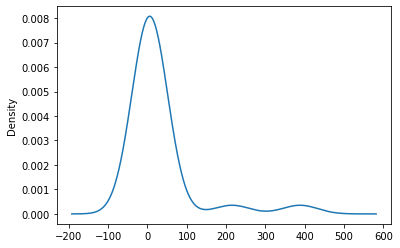

In [528]:
print('Only {}% of the records are missing from the \'Publisher\' feature. \n\nTherefore I will replace them as \'Unknown\'. \n\nI feel that this missing feature data cannot be assumed and it therefore relevant and worth keeping.\n'
      .format(int((heroes_df['Publisher'].isna().sum()/len(heroes_df['Publisher']))*100)))
heroes_df['Publisher'] = heroes_df['Publisher'].fillna('Unknown')
heroes_df['Publisher'].value_counts().plot.kde();
heroes_df.isna().sum()

In [529]:
heroes_df[heroes_df['Weight'] == -99]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
14,Alex Mercer,Male,-,Human,-,-99.0,Wildstorm,-,bad,-99.0
15,Alex Woolsly,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
18,Allan Quatermain,Male,-,-,-,-99.0,Wildstorm,-,good,-99.0
21,Ando Masahashi,Male,-,-,-,-99.0,NBC - Heroes,-,good,-99.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
26,Angela,Female,-,-,-,-99.0,Image Comics,-,bad,-99.0
31,Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,-,bad,-99.0
32,Anti-Spawn,Male,-,-,-,-99.0,Image Comics,-,bad,-99.0


In [514]:
# print(len(heroes_df['Weight'].value_counts()))
# print(heroes_df['Weight'].describe())
# heroes_df['Weight'].std()

# real_weights_list = heroes_df['Weight'][(heroes_df['Weight'] > 0) & (heroes_df['Weight'] < heroes_df['Weight'].quantile(.95))]
# real_weights_list.describe()

# lower_weight = heroes_df['Weight'].mean() - (real_weights_list.std()*3)
# upper_weight = heroes_df['Weight'].mean() + (real_weights_list.std()*3)

# print(lower_weight)
# print(upper_weight)

In [287]:
# rel_weights_prob = real_weights_list.value_counts(normalize=True)

# def weight_list_filter(weight):
#         if weight <= lower_weight:
#             return np.random.choice(rel_weights_prob.keys(), p=rel_weights_prob)
#         elif weight >= upper_weight:
#             return np.random.choice(rel_weights_prob.keys(), p=rel_weights_prob)
#         else:
#             return weight

# heroes_df['Weight'] = heroes_df['Weight'].map(lambda x: weight_list_filter(x))
# heroes_df['Weight'].isna().sum()

2

count    732.000000
mean      83.479508
std       33.165314
min        2.000000
25%       59.000000
50%       79.000000
75%       95.000000
max      230.000000
Name: Weight, dtype: float64
[105.  65.  90.  92. 117. 122.  77.  88.  61.  81. 104. 108.  83.  70.
  72.  82.  71. 101.  68. 146.  57.  54. 158.  86.  78.  25. 135. 106.
  63.  98. 110.  59.  50. 126.  67.  87.  52.  95.  79. 133. 115. 153.
  62. 124. 155. 113.  58.  17.  97. 119.  56. 214.  55.  99.  74. 116.
 207. 191. 167. 149.  51.  27.  91. 132.  89.  48.  80.  96.  18.  45.
  16. 230.   4.  39. 203. 170.   2.  14.  47.  49. 171. 143.  85.  36.
 140. 128. 125.  69. 176. 225.  76.  38. 131.  73.  41. 162.]


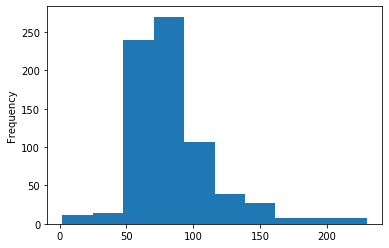

In [288]:
# # There still seemed to be 2 records with NaN values but I've spent enough time on this part so I will just dropt them here
# heroes_df = heroes_df.dropna(subset=['Weight'])
# print(heroes_df['Weight'].describe())
# print(heroes_df['Weight'].unique())
# heroes_df['Weight'].plot.hist();

Lots of work above to realize that it would definitely be better to just drope the rows that contain a - weight as the likely contain a - height as well and are useless for our analysis

In [538]:
# heroes_df = heroes_df.reset_index()
# heroes_df = heroes_df.drop('index', axis=1)

In [601]:
#Looks like there are lots of duplicate names, I think dropping the weights and heights will help.
heroes_df[heroes_df.duplicated(subset='name', keep=False)]
#Let's drop the weights that are < 0  now.
heroes_df = heroes_df[heroes_df['Weight'] > 0]
heroes_df = heroes_df[heroes_df['Height'] > 0]
# okay now lets check for duplicates again after resetting the index
# heroes_df = heroes_df.reset_index()
# heroes_df = heroes_df.drop(['level_0', 'index'], axis=1)

heroes_df[heroes_df.duplicated(subset=['name'], keep=False)]
# We see here that we have 3 versions of Spiderman, we can use the index to drop the one without a gender
# Then we can group the rest by ['name', 'gender'] and perhaps get rid of the extra
# heroes_df = heroes_df.drop(406)
heroes_df[heroes_df.duplicated(subset=['name'], keep=False)]
# Nova looks like it could be the name of two disticnt hero's, as they have different weights and genders
# This also goes for Captain marvel.  Lets add 'Gender' to the subset and then drop duplicates from there.
heroes_df.drop_duplicates(subset=['name', 'Gender'], inplace=True)
print(heroes_df.info())
heroes_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 488
Data columns (total 10 columns):
name          484 non-null object
Gender        484 non-null object
Eye color     484 non-null object
Race          484 non-null object
Hair color    484 non-null object
Height        484 non-null float64
Publisher     484 non-null object
Skin color    484 non-null object
Alignment     484 non-null object
Weight        484 non-null float64
dtypes: float64(2), object(8)
memory usage: 41.6+ KB
None


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
5,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
6,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
7,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0
8,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
9,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0


In [593]:

# We are going to have to get dirty and replace both female heros gender's manually!
heroes_df.iat[102, 1] = 'Female'
heroes_df.iat[161, 1] = 'Female'
heroes_df.iat[474, 1] = 'Female'
heroes_df[heroes_df['Gender'] == '-']

# Okay, they are gone from the list, now all we have to do is replace the '-' with male using the .map(lambda) method and we're good!

def man_maker(value):
    if value == '-':
        return 'Male'
    else:
        return value
heroes_df['Gender'] = heroes_df['Gender'].map(man_maker)
heroes_df['Gender'].unique()
# We did it! Now let have another look at our dataframe before we move on!

array(['Male', 'Female'], dtype=object)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [612]:
heroes_df.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,173.597902,77.888112
Male,192.944868,127.032258


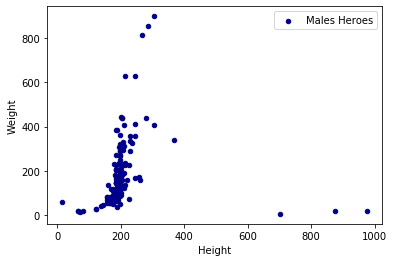

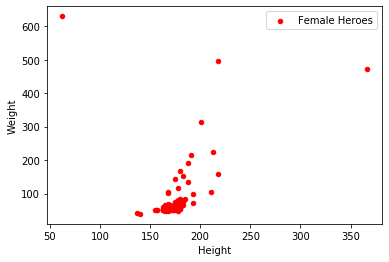

In [623]:
male_heroes_df = heroes_df[heroes_df['Gender'] == 'Male']
male_heroes_df.reset_index().plot.scatter(x='Height', y='Weight', color="darkblue", label='Males Heroes');
female_heroes_df = heroes_df[heroes_df['Gender'] == 'Female']
female_heroes_df.reset_index().plot(kind='scatter', x='Height', y='Weight', color='red', label='Female Heroes');

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [ ]:
male_heroes_df = None
female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    pass

In [ ]:
# Male Height


In [ ]:
# Male Weight


In [ ]:
# Female Height


In [ ]:
# Female Weight


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data